In [23]:
import pandas as pd
import numpy

## Open CSV file

In [10]:
lyrics_df = pd.read_csv('../data/10_songs_with_lyrics.csv')

In [14]:
test_lyric = lyrics_df['Genius_lyrics'][0]

## Code to get word count

In [3]:
def get_word_counts(words):
    word_list = words.split()
    word_counts = {}
    for word in word_list:
        if word in word_counts.keys():
            word_counts[word] +=1
        else:
            word_counts[word] = 1
    return word_counts

## Code for wordcloud

```
pip install wordcloud
```

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(test_lyric)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Code for sentiment analysis

```
pip install nltk
python -m nltk.downloader vader_lexicon
```

In [19]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [20]:
df = pd.DataFrame(columns=('artist', 'pos', 'neu', 'neg'))
sid = SentimentIntensityAnalyzer()
scores = sid.polarity_scores(test_lyric)
scores

{'neg': 0.095, 'neu': 0.836, 'pos': 0.069, 'compound': -0.4434}

In [25]:
sid = SentimentIntensityAnalyzer()

positive_count = 0
negative_count = 0
neutral_count = 0

for lyric in lyrics_df['Genius_lyrics']:
    comp = sid.polarity_scores(lyric)
    comp = comp['compound']
    if comp >= 0.5:
        positive_count += 1
    elif comp > -0.5 and comp < 0.5:
        neutral_count += 1
    else:
        negative_count += 1

total = negative_count + neutral_count + positive_count
percent_negative = (negative_count/float(total))*100
percent_neutral = (neutral_count/float(total))*100
percent_positive = (positive_count/float(total))*100

sentiment_df = pd.DataFrame({'Lyrics': [percent_positive, percent_neutral, percent_negative]}, index=['Positive', 'Neutral', 'Negative'])

sentiment_df

# Based on my research plotnine has no pie chart :()              
df.plot.pie(subplots=True)
plt.show()

AttributeError: 'float' object has no attribute 'encode'

In [26]:
songs_test['Genius_URL'] = songs_test.apply(lambda row: generate_song_url(row['Artist'], row['Song']), axis=1)

NameError: name 'songs_test' is not defined

## Lexical Richness

In [27]:
songs_test2 = songs_test

total_words = songs_test2['Genius_lyrics'].apply(lambda x: len(x.split()))
unique_words = songs_test2['Genius_lyrics'].apply(lambda x: len(set(x.split())))
songs_test2['lexical_richness'] = unique_words/total_words*100
songs_test2 = songs_test2.sort_values('lexical_richness')

songs_test3 = songs_test2.dropna()

songs_test3

NameError: name 'songs_test' is not defined

In [210]:
from plotnine import *

/Users/ruka/miniconda3/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 10'. Pick better value with 'binwidth'.


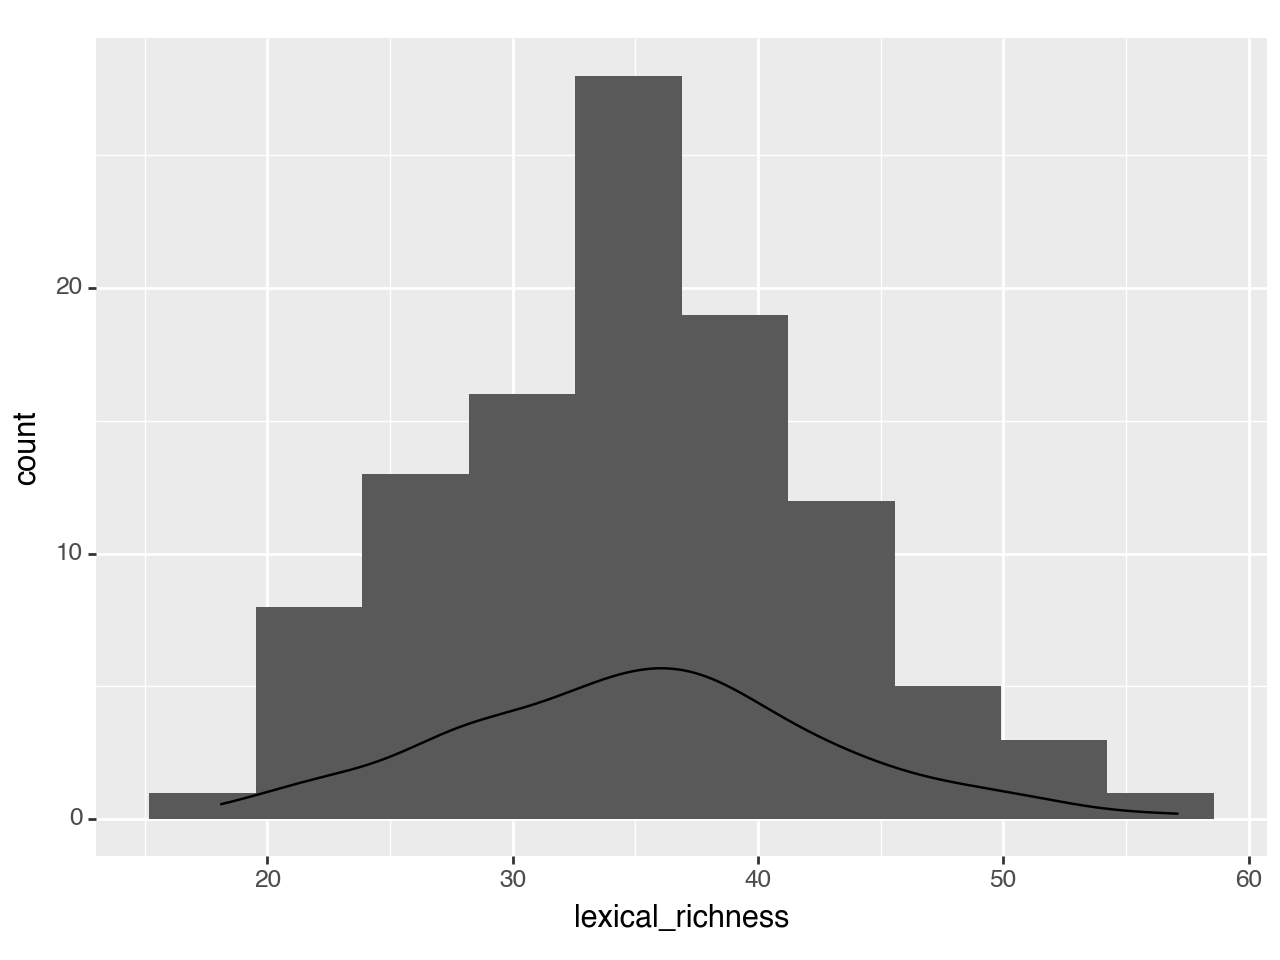

<Figure Size: (640 x 480)>

In [228]:
g = (
    ggplot(songs_test3, aes(x='lexical_richness', y=after_stat('count')))
    + geom_histogram()
    + geom_density()
)

g